<a href="https://colab.research.google.com/github/Ali-Kh0/DeepLearning2024/blob/main/MP01_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

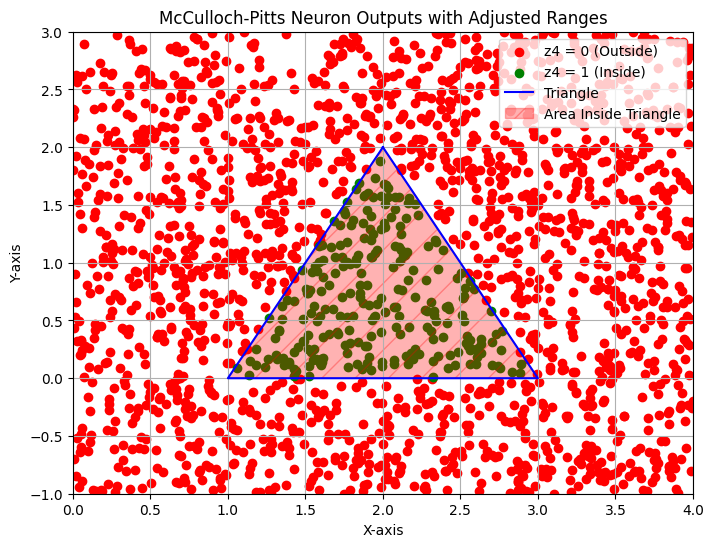

In [ ]:
# @title Q1, Section 3
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A = (2,2)
B = (3,0)
C = (1,0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='step'):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type

    def model(self, x):
        net = np.dot(self.weights, x)
        # For this demonstration, just use the standard step
        if self.activation_type == 'step':
            return 1 if net >= self.threshold else 0
        # Default to step if something else is chosen without implementation
        return 1 if net >= self.threshold else 0

# Define neurons for each inequality with standard step activation
# Conditions:
# y >= 0 => w=[0,1], θ=0
neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='step')

# y <= -2x+6 => -2x - y +6>=0 => w=[-2,-1], θ=-6
neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='step')

# y <= 2x-2 => 2x - y -2>=0 => w=[2,-1], θ=2
neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='step')

# Final neuron to AND all three conditions
# We want: z4=1 if z1=z2=z3=1. Using w=[1,1,1], θ=2.5
neur_final = McCulloch_Pitts_neuron([1,1,1], 2.5, activation_type='step')

def inside_triangle(x, y):
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    z4 = neur_final.model([z1,z2,z3])
    return z4

# Generate points in the requested ranges
num_points = 2000
x_values = np.random.uniform(0,4,num_points)    # X range: (0,4)
y_values = np.random.uniform(-1,3,num_points)   # Y range: (-1,3)

inside_x = []
inside_y = []
outside_x = []
outside_y = []

for i in range(num_points):
    z = inside_triangle(x_values[i], y_values[i])
    if z == 1:
        inside_x.append(x_values[i])
        inside_y.append(y_values[i])
    else:
        outside_x.append(x_values[i])
        outside_y.append(y_values[i])

plt.figure(figsize=(8,6))
plt.scatter(outside_x, outside_y, color='red', label='z4 = 0 (Outside)')
plt.scatter(inside_x, inside_y, color='green', label='z4 = 1 (Inside)')

# Plot the triangle
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')
plt.fill([A[0],B[0],C[0]], [A[1],B[1],C[1]], color='red', alpha=0.3, hatch='/', label='Area Inside Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('McCulloch-Pitts Neuron Outputs with Adjusted Ranges')
plt.grid(True)

# Update the axis limits
plt.xlim(0,4)
plt.ylim(-1,3)

plt.legend(loc='upper right')
plt.show()

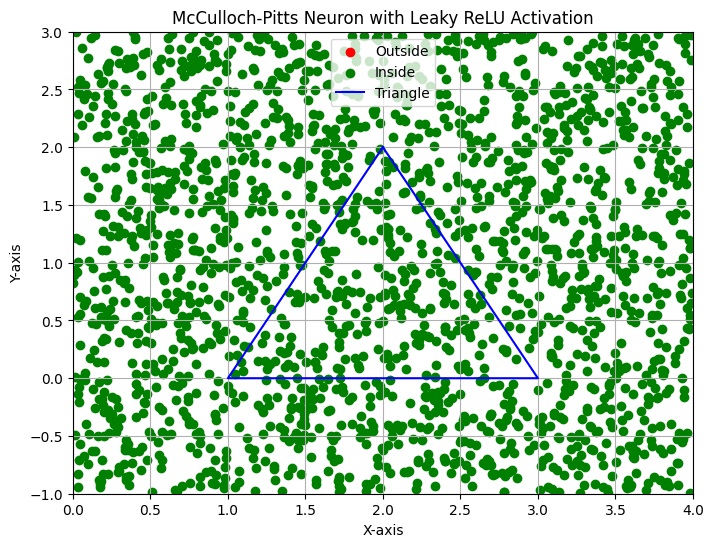

In [ ]:
# @title Q1 , Section 3 with Leaky ReLU
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A = (2,2)
B = (3,0)
C = (1,0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='leaky_relu', alpha=0.01):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type
        self.alpha = alpha  # Parameter for Leaky ReLU

    def model(self, x):
        net = np.dot(self.weights, x)

        if self.activation_type == 'leaky_relu':
            return net if net >= 0 else self.alpha * net  # Leaky ReLU

        return 1 if net >= self.threshold else 0  # Default step function

# Define neurons using Leaky ReLU
neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='leaky_relu')
neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='leaky_relu')
neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='leaky_relu')
neur_final = McCulloch_Pitts_neuron([1,1,1], 2.5, activation_type='leaky_relu')

def inside_triangle(x, y):
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    z4 = neur_final.model([z1,z2,z3])
    return 1 if z4 >= 0 else 0  # Convert back to binary output

num_points = 2000
x_values = np.random.uniform(0,4,num_points)
y_values = np.random.uniform(-1,3,num_points)

inside_x, inside_y, outside_x, outside_y = [], [], [], []

for i in range(num_points):
    z = inside_triangle(x_values[i], y_values[i])
    if z == 1:
        inside_x.append(x_values[i])
        inside_y.append(y_values[i])
    else:
        outside_x.append(x_values[i])
        outside_y.append(y_values[i])

plt.figure(figsize=(8,6))
plt.scatter(outside_x, outside_y, color='red', label='Outside')
plt.scatter(inside_x, inside_y, color='green', label='Inside')

# Plot the triangle
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('McCulloch-Pitts Neuron with Leaky ReLU Activation')
plt.legend()
plt.grid(True)
plt.xlim(0,4)
plt.ylim(-1,3)
plt.show()


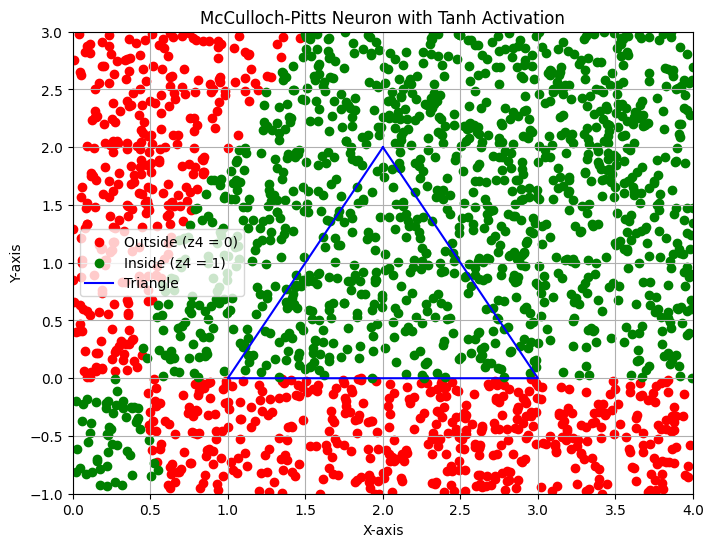

In [ ]:
# @title Q1, Section 3 with Hyperbolic Tangent (Tanh)
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A = (2,2)
B = (3,0)
C = (1,0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='tanh'):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type

    def tanh(self, x):
        return np.tanh(x)  # Tanh activation function

    def model(self, x):
        net = np.dot(self.weights, x)

        if self.activation_type == 'tanh':
            return self.tanh(net)  # Apply Tanh

        return 1 if net >= self.threshold else 0  # Default step function

# Define neurons using Tanh activation
neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='tanh')
neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='tanh')
neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='tanh')
neur_final = McCulloch_Pitts_neuron([1,1,1], 0, activation_type='tanh')  # Adjusted threshold for Tanh

def inside_triangle(x, y):
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    z4 = neur_final.model([z1,z2,z3])
    return 1 if z4 >= 0 else 0  # Decision boundary at 0 instead of 0.5

num_points = 2000
x_values = np.random.uniform(0,4,num_points)
y_values = np.random.uniform(-1,3,num_points)

inside_x, inside_y, outside_x, outside_y = [], [], [], []

for i in range(num_points):
    z = inside_triangle(x_values[i], y_values[i])
    if z == 1:
        inside_x.append(x_values[i])
        inside_y.append(y_values[i])
    else:
        outside_x.append(x_values[i])
        outside_y.append(y_values[i])

plt.figure(figsize=(8,6))
plt.scatter(outside_x, outside_y, color='red', label='Outside (z4 = 0)')
plt.scatter(inside_x, inside_y, color='green', label='Inside (z4 = 1)')

# Plot the triangle
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('McCulloch-Pitts Neuron with Tanh Activation')
plt.legend()
plt.grid(True)
plt.xlim(0,4)
plt.ylim(-1,3)
plt.show()


In [ ]:
# @title Q2.1
import pandas as pd


dataset = pd.read_csv('teleCust1000t.csv')

print(dataset.head())


   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


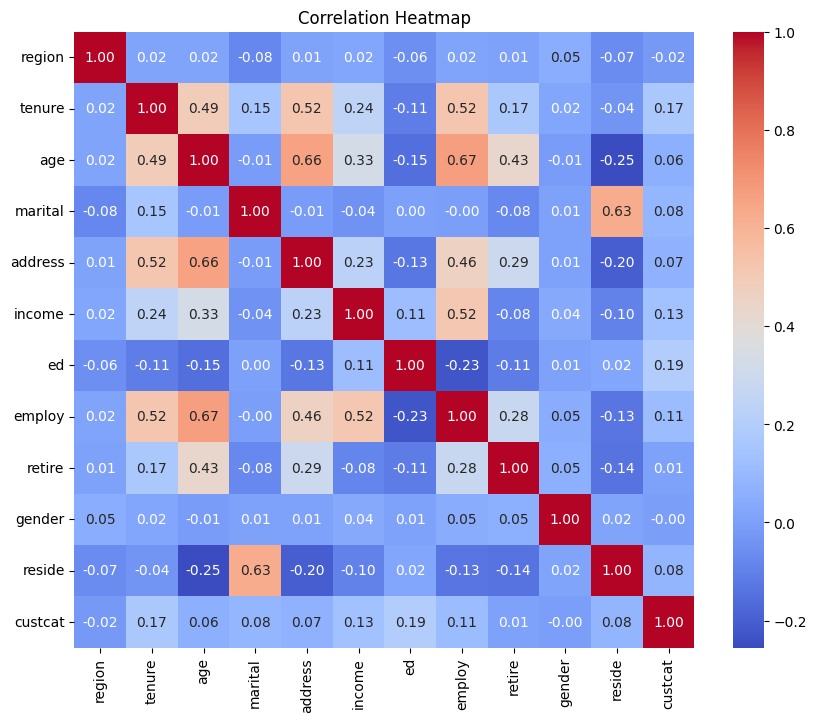

Top correlated features with 'custcat': ['ed', 'tenure']


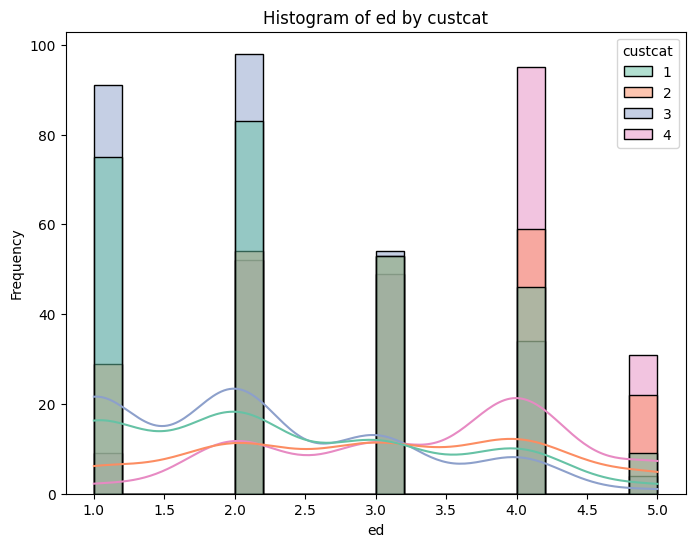

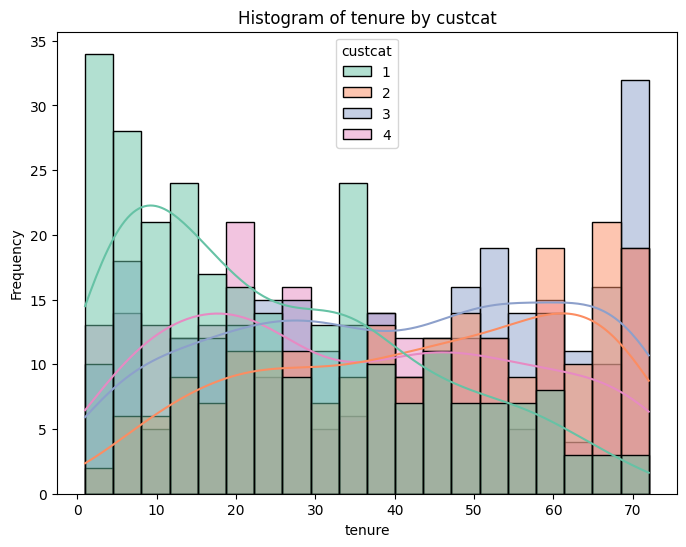

In [ ]:
# @title Q2.2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# خواندن فایل CSV
dataset = pd.read_csv('teleCust1000t.csv')

# محاسبه ماتریس همبستگی
correlation_matrix = dataset.corr()

# رسم هیت‌مپ
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# یافتن ویژگی‌هایی با بیشترین همبستگی با فیلد هدف (custcat)
target_correlation = correlation_matrix['custcat'].sort_values(ascending=False)

# نمایش دو ویژگی با بیشترین همبستگی
top_features = target_correlation.index[1:3]
print(f"Top correlated features with 'custcat': {top_features.tolist()}")

# رسم هیستوگرام برای این دو ویژگی
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset, x=feature, kde=True, hue='custcat', palette="Set2", bins=20)
    plt.title(f"Histogram of {feature} by custcat")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
# @title Q2.3
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# خواندن فایل CSV
dataset = pd.read_csv('teleCust1000t.csv')

# جدا کردن ویژگی‌ها (X) و فیلد هدف (y)
X = dataset.drop('custcat', axis=1)  # حذف ستون هدف
y = dataset['custcat']  # ستون هدف

# نرمالایز کردن داده‌ها با MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# تقسیم داده‌ها به train و test (80%-20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# تقسیم داده‌های باقی‌مانده به validation و test (50%-50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# نمایش ابعاد داده‌ها
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_validation.shape}, {y_validation.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (800, 11), (800,)
Validation set: (100, 11), (100,)
Test set: (100, 11), (100,)


In [ ]:
# @title Q2.4
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
dataset = pd.read_csv('teleCust1000t.csv')

# Separate features (X) and target (y)
X = dataset.drop('custcat', axis=1)
y = dataset['custcat']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode target (y) as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ensure inputs are NumPy arrays (optional but recommended)
X_train = np.array(X_train)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

# Define Model 1: Single Hidden Layer
model_1 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # 1 hidden layer with 16 neurons
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile Model 1
model_1.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
print("\nTraining Model 1:")
history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16)

# Evaluate Model 1
print("\nEvaluating Model 1 on Test Data:")
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test)
y_pred_1 = model_1.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred_1))

# Define Model 2: Two Hidden Layers
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # 1st hidden layer with 32 neurons
    Dense(16, activation='relu'),  # 2nd hidden layer with 16 neurons
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile Model 2
model_2.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
print("\nTraining Model 2:")
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16)

# Evaluate Model 2
print("\nEvaluating Model 2 on Test Data:")
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
y_pred_2 = model_2.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred_2))



Training Model 1:
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2835 - loss: 1.4131 - val_accuracy: 0.2200 - val_loss: 1.4062
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2464 - loss: 1.4017 - val_accuracy: 0.2300 - val_loss: 1.3990
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.3966 - val_accuracy: 0.2900 - val_loss: 1.3928
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 1.3799 - val_accuracy: 0.2700 - val_loss: 1.3875
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.3748 - val_accuracy: 0.2900 - val_loss: 1.3826
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3026 - loss: 1.3675 - val_accuracy: 0.2800 - val_loss: 1.3779
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.3820 - val_accuracy: 0.2900 - val_loss: 1.3737
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3157 - loss: 1.3605 - val_accuracy: 0.2900 - val_loss: 1.3706
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1835 - loss: 1.4243 - val_accuracy: 0.1700 - val_loss: 1.4151
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2319 - loss: 1.4071 - val_accuracy: 0.1600 - val_loss: 1.4042
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2639 - loss: 1.3903 - val_accuracy: 0.2200 - val_loss: 1.3974
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2672 - loss: 1.3848 - val_accuracy: 0.2400 - val_loss: 1.3929
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.3880 - val_accuracy: 0.2500 - val_loss: 1.3900
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2768 - loss: 1.3858 - val_accuracy: 0.2600 - val_loss: 1.3877
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 1.3799 - val_accuracy: 0.2600 - val_loss: 1.3855
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 1.3831 - val_accuracy: 0.2700 - val_loss: 1.3833
Epo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


تاثیر تغییر تعداد نورون ها در دو حالت

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


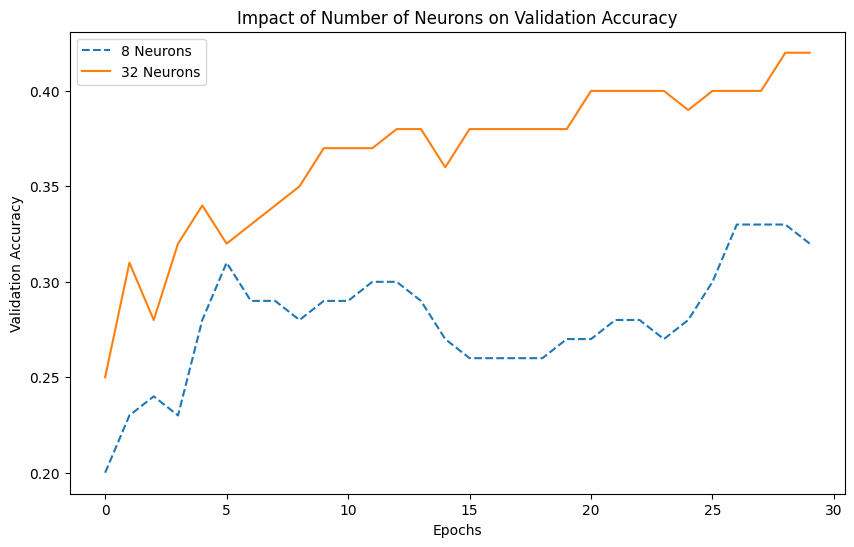


Evaluating Model with 8 Neurons:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3586 - loss: 1.3585 

Evaluating Model with 32 Neurons:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3192 - loss: 1.3009 
Model with 8 Neurons - Test Accuracy: 0.3600
Model with 32 Neurons - Test Accuracy: 0.3500


In [ ]:
import matplotlib.pyplot as plt

# Function to build and train models with different numbers of neurons
def build_and_train_model(neurons):
    # Define the model
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with variable neurons
        Dense(4, activation='softmax')  # Output layer for 4 classes
    ])

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16, verbose=0)

    return model, history

# Case 1: Model with 8 neurons
model_8_neurons, history_8 = build_and_train_model(neurons=8)

# Case 2: Model with 32 neurons
model_32_neurons, history_32 = build_and_train_model(neurons=32)

# Plot validation accuracy for both cases
plt.figure(figsize=(10, 6))
plt.plot(history_8.history['val_accuracy'], label='8 Neurons', linestyle='--')
plt.plot(history_32.history['val_accuracy'], label='32 Neurons', linestyle='-')
plt.title('Impact of Number of Neurons on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate both models on the test dataset
print("\nEvaluating Model with 8 Neurons:")
test_loss_8, test_accuracy_8 = model_8_neurons.evaluate(X_test, y_test)
print("\nEvaluating Model with 32 Neurons:")
test_loss_32, test_accuracy_32 = model_32_neurons.evaluate(X_test, y_test)

# Print results for comparison
print(f"Model with 8 Neurons - Test Accuracy: {test_accuracy_8:.4f}")
print(f"Model with 32 Neurons - Test Accuracy: {test_accuracy_32:.4f}")


تاثیر لایه نرمال سازی

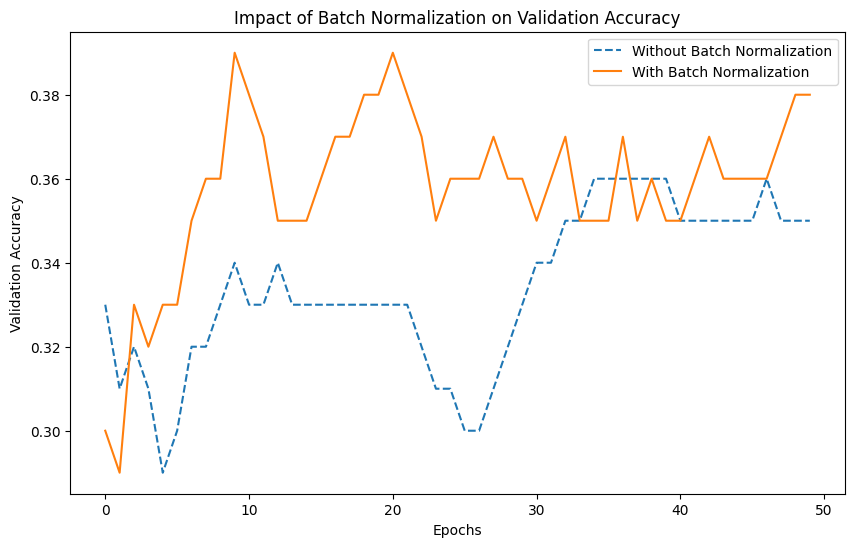


Evaluating Model Without Batch Normalization:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2981 - loss: 0.1840 

Evaluating Model With Batch Normalization:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3541 - loss: 0.1792 
Model Without Batch Normalization - Test Accuracy: 0.3000
Model With Batch Normalization - Test Accuracy: 0.3800


In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Function to build and train models with or without Batch Normalization
def build_and_train_model_with_bn(use_bn=False):
    model = Sequential()
    # Add hidden layer
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    # Optionally add Batch Normalization
    if use_bn:
        model.add(BatchNormalization())
    # Add output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=4, verbose=0)

    return model, history

# Case 1: Model without Batch Normalization
model_no_bn, history_no_bn = build_and_train_model_with_bn(use_bn=False)

# Case 2: Model with Batch Normalization
model_with_bn, history_with_bn = build_and_train_model_with_bn(use_bn=True)

# Plot validation accuracy for both cases
plt.figure(figsize=(10, 6))
plt.plot(history_no_bn.history['val_accuracy'], label='Without Batch Normalization', linestyle='--')
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Normalization', linestyle='-')
plt.title('Impact of Batch Normalization on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate both models on the test dataset
print("\nEvaluating Model Without Batch Normalization:")
test_loss_no_bn, test_accuracy_no_bn = model_no_bn.evaluate(X_test, y_test)
print("\nEvaluating Model With Batch Normalization:")
test_loss_with_bn, test_accuracy_with_bn = model_with_bn.evaluate(X_test, y_test)

# Print results for comparison
print(f"Model Without Batch Normalization - Test Accuracy: {test_accuracy_no_bn:.4f}")
print(f"Model With Batch Normalization - Test Accuracy: {test_accuracy_with_bn:.4f}")


تاثیر Dropout

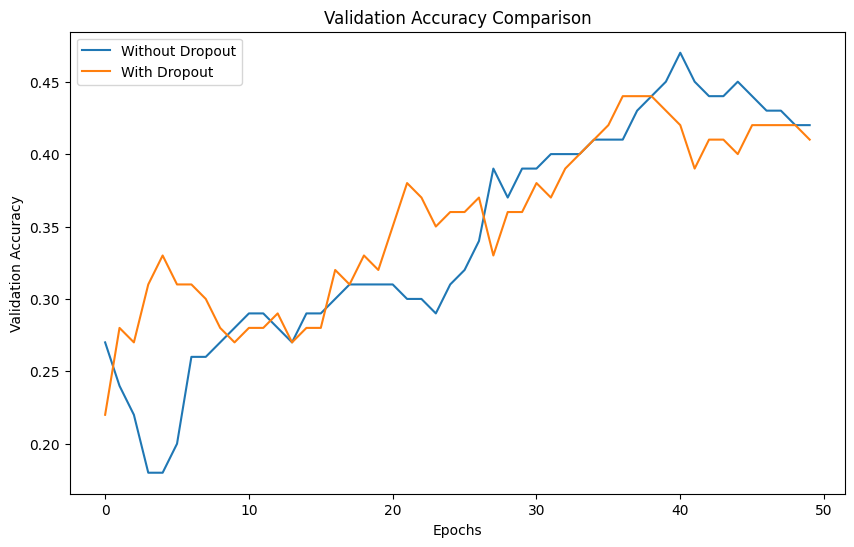


Evaluating Best Model Without Dropout:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3225 - loss: 1.3885 

Evaluating Model With Dropout:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3770 - loss: 1.3628 

Best Model Without Dropout - Test Accuracy: 0.3400
Model With Dropout - Test Accuracy: 0.3800


In [ ]:
from tensorflow.keras.layers import Dropout

# Function to build and train models with Dropout
def build_and_train_model_with_dropout(use_bn=False, dropout_rate=0.3):
    model = Sequential()
    # Add hidden layer
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    # Optionally add Batch Normalization
    if use_bn:
        model.add(BatchNormalization())
    # Add Dropout layer
    model.add(Dropout(dropout_rate))
    # Add output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16, verbose=0)

    return model, history

# Case 1: Best Model Without Dropout (Baseline)
best_model_no_dropout, best_history_no_dropout = build_and_train_model_with_bn(use_bn=True)

# Case 2: Add Dropout to Best Model
model_with_dropout, history_with_dropout = build_and_train_model_with_dropout(use_bn=True, dropout_rate=0.3)

# Plot validation accuracy for both cases
plt.figure(figsize=(10, 6))
plt.plot(best_history_no_dropout.history['val_accuracy'], label='Without Dropout', linestyle='--')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout', linestyle='-')
plt.title('Impact of Dropout on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate both models on the test dataset
print("\nEvaluating Best Model Without Dropout:")
test_loss_no_dropout, test_accuracy_no_dropout = best_model_no_dropout.evaluate(X_test, y_test)
print("\nEvaluating Model With Dropout:")
test_loss_with_dropout, test_accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test)

# Print results for comparison
print(f"Best Model Without Dropout - Test Accuracy: {test_accuracy_no_dropout:.4f}")
print(f"Model With Dropout - Test Accuracy: {test_accuracy_with_dropout:.4f}")


تاثیر L2-Regularization

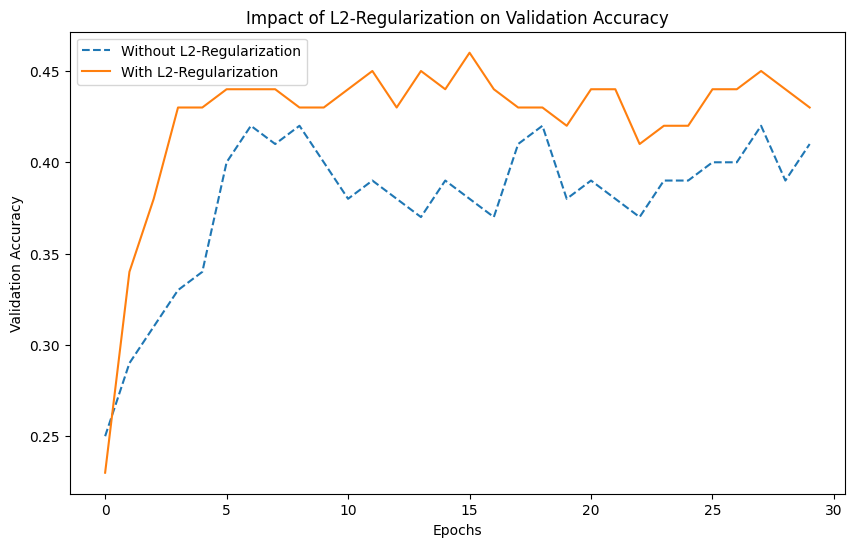


Evaluating Best Model Without L2-Regularization:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3708 - loss: 1.3193 

Evaluating Model With L2-Regularization:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3522 - loss: 1.2932 
Best Model Without L2-Regularization - Test Accuracy: 0.3800
Model With L2-Regularization - Test Accuracy: 0.3700


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Function to build and train models with optional Batch Normalization, Dropout, and L2-Regularization
def build_and_train_model(use_bn=False, use_dropout=False, dropout_rate=0.3, l2_rate=0.0):
    model = Sequential()
    # Add a hidden layer with L2-Regularization
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=l2(l2_rate)))

    # Optionally add Batch Normalization
    if use_bn:
        model.add(BatchNormalization())

    # Optionally add Dropout
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Add output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16, verbose=0)

    return model, history

# Case 1: Best Model Without L2-Regularization (Baseline)
best_model_no_l2, best_history_no_l2 = build_and_train_model(use_bn=True, use_dropout=True, dropout_rate=0.3, l2_rate=0.0)

# Case 2: Best Model with L2-Regularization
model_with_l2, history_with_l2 = build_and_train_model(use_bn=True, use_dropout=True, dropout_rate=0.3, l2_rate=0.0001)

# Plot validation accuracy for both cases
plt.figure(figsize=(10, 6))
plt.plot(best_history_no_l2.history['val_accuracy'], label='Without L2-Regularization', linestyle='--')
plt.plot(history_with_l2.history['val_accuracy'], label='With L2-Regularization', linestyle='-')
plt.title('Impact of L2-Regularization on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate both models on the test dataset
print("\nEvaluating Best Model Without L2-Regularization:")
test_loss_no_l2, test_accuracy_no_l2 = best_model_no_l2.evaluate(X_test, y_test)
print("\nEvaluating Model With L2-Regularization:")
test_loss_with_l2, test_accuracy_with_l2 = model_with_l2.evaluate(X_test, y_test)

# Print results for comparison
print(f"Best Model Without L2-Regularization - Test Accuracy: {test_accuracy_no_l2:.4f}")
print(f"Model With L2-Regularization - Test Accuracy: {test_accuracy_with_l2:.4f}")



Training with Adam Optimizer:
Test Accuracy with Adam: 0.4600

Training with RMSprop Optimizer:
Test Accuracy with RMSprop: 0.4300


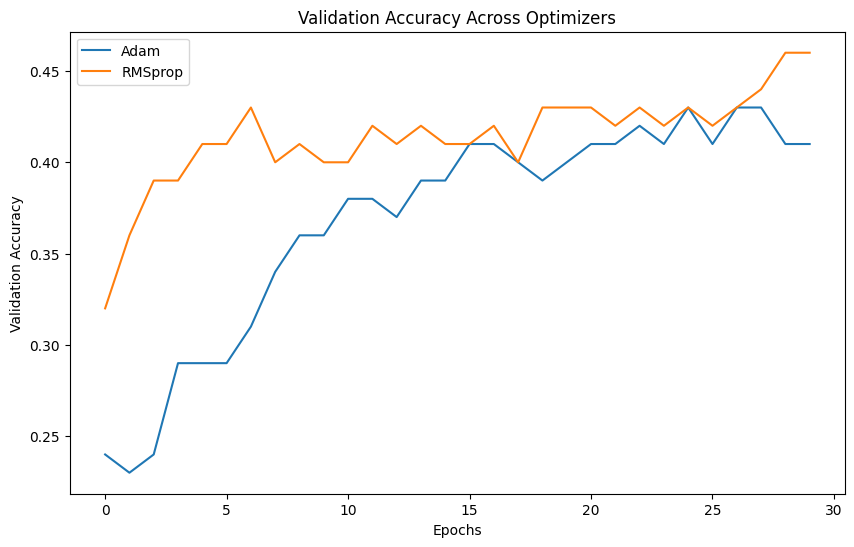


Optimizer: Adam
Test Loss: 1.2809
Test Accuracy: 0.4600

Optimizer: RMSprop
Test Loss: 1.3117
Test Accuracy: 0.4300


In [ ]:
# @title Q2.4-5 RMSprop , Adam
from tensorflow.keras.optimizers import Adam, RMSprop

# Function to build and train models with specified optimizer
def build_and_train_model_with_optimizer(optimizer, use_bn=False, use_dropout=False, dropout_rate=0.3, l2_rate=0.0):
    model = Sequential()
    # Add hidden layer with L2-Regularization
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=l2(l2_rate)))

    # Optionally add Batch Normalization
    if use_bn:
        model.add(BatchNormalization())

    # Optionally add Dropout
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Add output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), batch_size=16, verbose=0)

    return model, history

# Optimizers to test
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Train and evaluate models with each optimizer
results = {}
for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} Optimizer:")
    model, history = build_and_train_model_with_optimizer(
        optimizer=optimizer, use_bn=True, use_dropout=True, dropout_rate=0.3, l2_rate=0.0001
    )

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[optimizer_name] = {
        'model': model,
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }
    print(f"Test Accuracy with {optimizer_name}: {test_accuracy:.4f}")

# Plot Validation Accuracy for All Optimizers
plt.figure(figsize=(10, 6))
for optimizer_name, result in results.items():
    plt.plot(result['history'].history['val_accuracy'], label=f'{optimizer_name}')
plt.title('Validation Accuracy Across Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Print Final Test Results
for optimizer_name, result in results.items():
    print(f"\nOptimizer: {optimizer_name}")
    print(f"Test Loss: {result['test_loss']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")


In [ ]:
pip install torch-adopt


In [ ]:
# @title Train with ADOPT
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from adopt import ADOPT

# Load and preprocess your dataset
# Assuming X_train, y_train, X_validation, y_validation, X_test, y_test are NumPy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define your model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Model hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 4

model = MLPModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = ADOPT(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation step
    model.eval()
    validation_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            validation_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    validation_accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Evaluate on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/30, Train Loss: 34.9952, Validation Loss: 5.5428, Validation Accuracy: 0.2600
Epoch 2/30, Train Loss: 34.7801, Validation Loss: 5.4725, Validation Accuracy: 0.2500
Epoch 3/30, Train Loss: 34.5927, Validation Loss: 5.4037, Validation Accuracy: 0.2700
Epoch 4/30, Train Loss: 34.3692, Validation Loss: 5.3669, Validation Accuracy: 0.3200
Epoch 5/30, Train Loss: 34.1267, Validation Loss: 5.3260, Validation Accuracy: 0.3300
Epoch 6/30, Train Loss: 33.8599, Validation Loss: 5.3109, Validation Accuracy: 0.3600
Epoch 7/30, Train Loss: 33.6050, Validation Loss: 5.2558, Validation Accuracy: 0.3600
Epoch 8/30, Train Loss: 33.3253, Validation Loss: 5.2134, Validation Accuracy: 0.3600
Epoch 9/30, Train Loss: 33.0076, Validation Loss: 5.1966, Validation Accuracy: 0.4200
Epoch 10/30, Train Loss: 32.7427, Validation Loss: 5.1296, Validation Accuracy: 0.4100
Epoch 11/30, Train Loss: 32.4530, Validation Loss: 5.1436, Validation Accuracy: 0.4200
Epoch 12/30, Train Loss: 32.1814, Validation Loss: 5

In [ ]:
# @title Q2.5
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random

# Load the dataset
file_path = 'teleCust1000t.csv'  # Update to the correct path if needed
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop('custcat', axis=1).values
y = dataset['custcat'].values

# Fix target labels to start from 0
y = y - 1  # Adjust all labels by subtracting 1

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Model hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 4

model = MLPModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate on the test dataset
model.eval()
test_loss = 0.0
correct = 0
total = 0
all_outputs = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

        # Save outputs and targets for later analysis
        all_outputs.extend(outputs.tolist())
        all_targets.extend(targets.tolist())

test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Randomly select 10 samples from the test data
random_indices = random.sample(range(len(all_outputs)), 10)
print("\nRandomly Selected Test Samples and Predictions:")

for idx in random_indices:
    predicted_values = all_outputs[idx]
    true_label = all_targets[idx]
    predicted_label = np.argmax(predicted_values)
    print(f"Sample {idx + 1}:")
    print(f"  - Network Output (Logits): {predicted_values}")
    print(f"  - Predicted Label: {predicted_label}")
    print(f"  - Ground Truth Label: {true_label}\n")


Test Loss: 5.3591
Test Accuracy: 0.3300

Randomly Selected Test Samples and Predictions:
Sample 60:
  - Network Output (Logits): [-0.09044910222291946, -0.13577762246131897, 0.18283826112747192, -0.12286864221096039]
  - Predicted Label: 2
  - Ground Truth Label: 1

Sample 80:
  - Network Output (Logits): [-0.137590229511261, -0.2089158594608307, -0.13602127134799957, 0.025570854544639587]
  - Predicted Label: 3
  - Ground Truth Label: 3

Sample 88:
  - Network Output (Logits): [-0.0054960474371910095, -0.17608778178691864, 0.008657747879624367, -0.20649215579032898]
  - Predicted Label: 2
  - Ground Truth Label: 0

Sample 91:
  - Network Output (Logits): [-0.03669000416994095, -0.2330138385295868, 0.36840951442718506, -0.12913130223751068]
  - Predicted Label: 2
  - Ground Truth Label: 2

Sample 8:
  - Network Output (Logits): [0.13812842965126038, -0.23390309512615204, 0.08086730539798737, -0.17751848697662354]
  - Predicted Label: 0
  - Ground Truth Label: 2

Sample 33:
  - Network 

In [ ]:

def predict_probabilities(model, X):
    model.eval()
    with torch.no_grad():
        out = nn.Softmax(dim=1)(model(X))
        return out.cpu().numpy()

# Compute probabilities for each model
prob_adam_1_layer = predict_probabilities(model_adam_1_layer, X_test_t)
prob_adam_2_layer = predict_probabilities(model_adam_2_layer, X_test_t)

prob_rmsprop_1_layer = predict_probabilities(model_rmsprop_1_layer, X_test_t)
prob_rmsprop_2_layer = predict_probabilities(model_rmsprop_2_layer, X_test_t)

prob_adopt_1_layer = predict_probabilities(model_adopt_1_layer, X_test_t)
prob_adopt_2_layer = predict_probabilities(model_adopt_2_layer, X_test_t)


# Define weights based on your evaluation of confusion matrices
weights = {
    'adam_1_layer': 0.3,    # Higher weight for good accuracy
    'adam_2_layer': 0.25,   # Slightly lower than 1-layer Adam
    'rmsprop_1_layer': 0.2, # Balanced performance
    'rmsprop_2_layer': 0.15,
    'adopt_1_layer': 0.05,  # Lowest weights for ADOPT
    'adopt_2_layer': 0.05
}

# Compute weighted probabilities for ensemble
ensemble_prob = (
    weights['adam_1_layer'] * prob_adam_1_layer +
    weights['adam_2_layer'] * prob_adam_2_layer +
    weights['rmsprop_1_layer'] * prob_rmsprop_1_layer +
    weights['rmsprop_2_layer'] * prob_rmsprop_2_layer +
    weights['adopt_1_layer'] * prob_adopt_1_layer +
    weights['adopt_2_layer'] * prob_adopt_2_layer
)

# Final predictions from weighted probabilities
ensemble_preds = np.argmax(ensemble_prob, axis=1)

# Evaluate ensemble performance
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print(f"\nWeighted Ensemble Accuracy: {ensemble_acc:.4f}")

# Classification Report for Ensemble
print("\nClassification Report for Weighted Ensemble:")
print(classification_report(y_test, ensemble_preds, target_names=class_names.values()))

# Confusion Matrix for Weighted Ensemble
ensemble_cm = confusion_matrix(y_test, ensemble_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Confusion Matrix - Weighted Ensemble')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()